#DATASET : https://www.kaggle.com/datasets/divu2001/text-with-sentiment


#About Dataset

This dataset contains many text along with their respective sentiment.
The sentiment contains joy, fear, sadness, neutral etc.
The dataset contains 2 columns- Sentiment and the text

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('/content/emotion_dataset_raw.csv')
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [3]:
df.shape

(34792, 2)

#**Data Cleaning and EDA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


In [5]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [6]:
df.duplicated().sum()

3630

In [7]:
df.describe()

,Emotion,Text
count,34792,34792
unique,8,31110
top,joy,Yes .
freq,11045,76


In [8]:
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

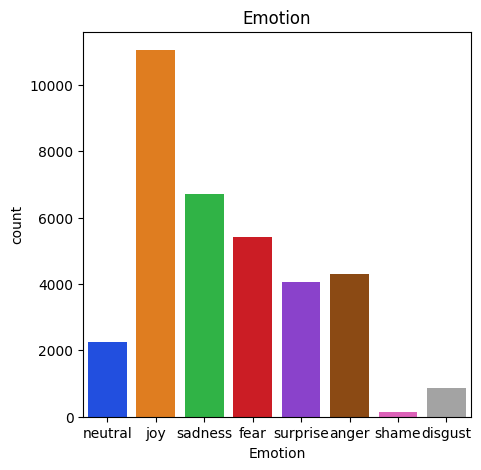

In [9]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df['Emotion'], palette='bright')
plt.title('Emotion')
plt.show()

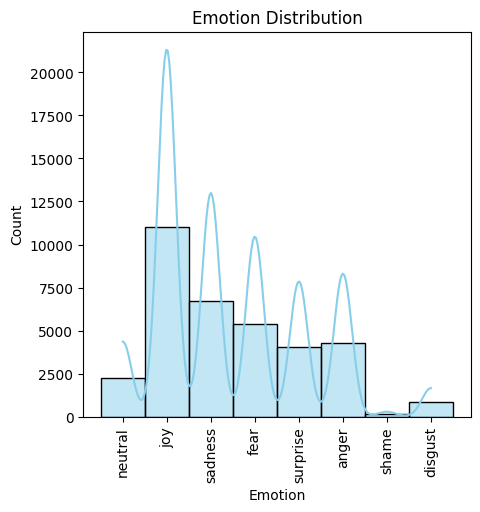

In [10]:
plt.figure(figsize=(5, 5))
sns.histplot(x=df['Emotion'], kde=True,color='skyblue')
plt.xticks(rotation=90)
plt.title('Emotion Distribution')
plt.show()

#**Text Preprocessing**

#**Word Cloud**

In [11]:
all_words = ' '.join(word for word in df['Text'])

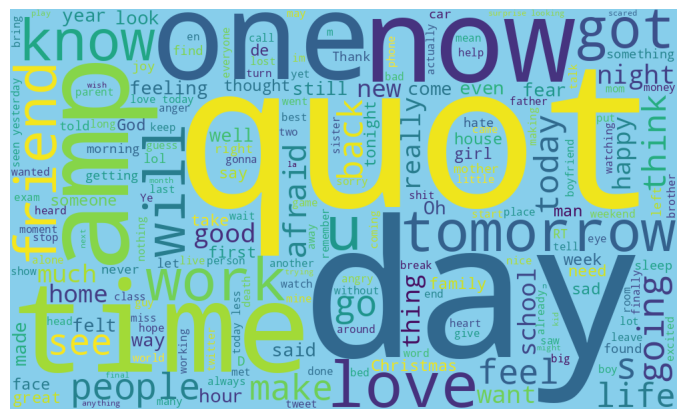

In [12]:
wordcloud = WordCloud(
    width = 1000,
    height = 600,
    background_color = 'skyblue',
    min_font_size = 10).generate(all_words)
plt.figure(figsize = (7, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

#**Text Preprocessing**

In [13]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

X = df['Text']
y = df['Emotion']

X_array = X.to_numpy()

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_array.reshape(-1, 1), y)

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



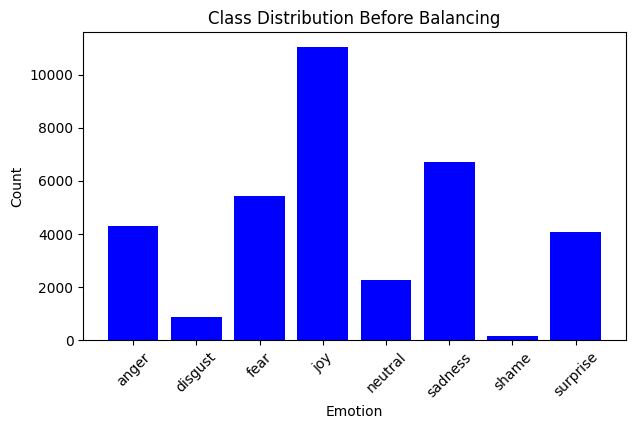

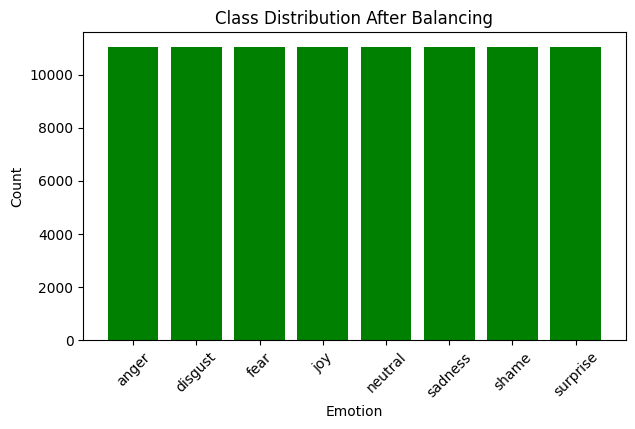

In [14]:
import matplotlib.pyplot as plt

# Get class distribution before balancing
unique_classes, class_counts = np.unique(y, return_counts=True)

plt.figure(figsize=(7, 4))
plt.bar(unique_classes, class_counts, color='blue')
plt.title('Class Distribution Before Balancing')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Get class distribution after balancing
unique_classes_resampled, class_counts_resampled = np.unique(y_resampled, return_counts=True)

plt.figure(figsize=(7, 4))
plt.bar(unique_classes_resampled, class_counts_resampled, color='green')
plt.title('Class Distribution After Balancing')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



In [15]:
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#**Model Building**

#Multinomial Naive Bayes

In [17]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')

def cleansing(df):
    if isinstance(df, np.ndarray):
        df = pd.DataFrame(df, columns=['Text'])
    elif isinstance(df, pd.Series):
        df = pd.DataFrame(df, columns=['Text'])

    # Converting to lower case
    df['Text'] = df['Text'].str.lower()

    # Removing URLs
    df['Text'] = df['Text'].str.replace(r'http\S+', '', regex=True)

    # Removing mentions
    df['Text'] = df['Text'].str.replace(r'@[\w_]+', '', regex=True)

    # Removing hashtags
    df['Text'] = df['Text'].str.replace(r'#', '', regex=False)

    # Removing digits
    df['Text'] = df['Text'].str.replace(r'\d+', '', regex=True)

    # Removing punctuation
    df['Text'] = df['Text'].str.replace(r'[^\w\s]', ' ', regex=True)

    # Removing extra whitespace
    df['Text'] = df['Text'].str.replace(r'\s+', ' ', regex=True).str.strip()

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    df['Text'] = df['Text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

    # Stemming
    stemmer = PorterStemmer()
    df['Text'] = df['Text'].apply(lambda x: ' '.join(stemmer.stem(word) for word in x.split()))

    return df['Text'].tolist()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
# Clean the data
X_train_clean = cleansing(X_train)
X_test_clean = cleansing(X_test)

# Initialize and fit the TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_clean)

# Train the Random Forest model
RandFor = RandomForestClassifier(random_state=777)
RandFor.fit(X_train_vectorized, y_train)

# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test_clean)

# Make predictions
y_pred = RandFor.predict(X_test_vectorized)
# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       anger       0.92      0.92      0.92      2203
     disgust       0.99      1.00      1.00      2191
        fear       0.96      0.92      0.94      2317
         joy       0.76      0.77      0.77      2186
     neutral       0.90      1.00      0.95      2166
     sadness       0.86      0.80      0.83      2185
       shame       1.00      1.00      1.00      2201
    surprise       0.94      0.93      0.93      2223

    accuracy                           0.92     17672
   macro avg       0.92      0.92      0.92     17672
weighted avg       0.92      0.92      0.92     17672



In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9176


In [27]:
def predict_new_text(new_text, vectorizer, model):
    new_text_df = pd.DataFrame([new_text], columns=['Text'])
    # Clean the new text
    new_text_clean = cleansing(new_text_df)
    # Vectorize the new text
    new_text_vectorized = vectorizer.transform(new_text_clean)
    # Make prediction
    prediction = model.predict(new_text_vectorized)
    return prediction

In [28]:
new_text1 = "@Sashairene hahaha oh man please come to pomona i would love to see you everyday instead of like once a year if that"
new_text2 ="This is deeply upsetting. I can't help but feel so sad about it."

# Predicting the new text
new_text_prediction1 = predict_new_text(new_text1, vectorizer,RandFor)
new_text_prediction2 = predict_new_text(new_text2, vectorizer,RandFor)
print("Prediction for new text:",new_text_prediction1 , new_text_prediction2)

Prediction for new text: ['joy'] ['sadness']
